In [1]:


%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils



import json
import copy

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = OpenChemIE(device = torch.device('cuda'))

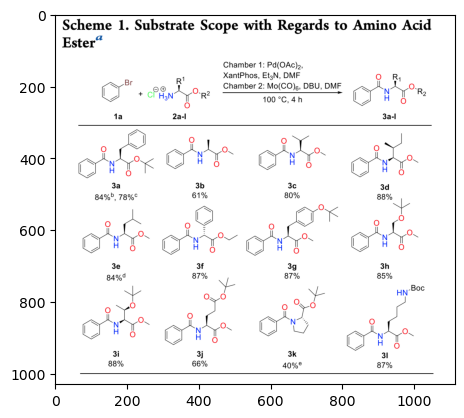

In [3]:
file_name = 'acs.joc.3c00972 example 1.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [4]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATe

{'CC(C)(C)OC(=O)[C@H](Cc1ccccc1)NC(=O)c1ccccc1': ['3a'], 'COC(=O)[C@@H](NC(=O)c1ccccc1)[C@@H](C)OC(C)(C)C': ['3i'], 'COC(=O)[C@H](CC(C)C)NC(=O)c1ccccc1': ['3e'], 'Brc1ccccc1': ['1a'], 'Cl.[2*]OC(=O)[C@H]([7*])N': ['2a-|'], 'CCOC(=O)[C@H](NC(=O)c1ccccc1)c1ccccc1': ['3f'], 'COC(=O)[C@H](CCC(=O)OC(C)(C)C)NC(=O)c1ccccc1': ['3j'], 'COC(=O)[C@H](C)NC(=O)c1ccccc1': ['3b'], 'COC(=O)[C@H](Cc1ccc(OC(C)(C)C)cc1)NC(=O)c1ccccc1': ['87%', '3g'], 'COC(=O)[C@@H](NC(=O)c1ccccc1)C(C)C': ['3c'], 'CC(C)(C)OC(=O)[C@@H]1CCCN1C(=O)c1ccccc1': ['3k'], 'COC(=O)[C@H](CCCCNC(=O)OC(C)(C)C)NC(=O)c1ccccc1': ['31'], 'COC(=O)[C@H](COC(C)(C)C)NC(=O)c1ccccc1': ['3h'], 'CC[C@H](C)[C@H](NC(=O)c1ccccc1)C(=O)OC': ['3d'], '[2*]OC(=O)[C@H]([7*])NC(=O)c1ccccc1': ['3a-|']}


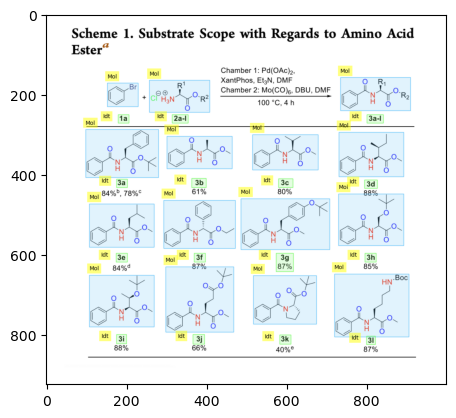

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

Inspect the RxnScribe Outputs

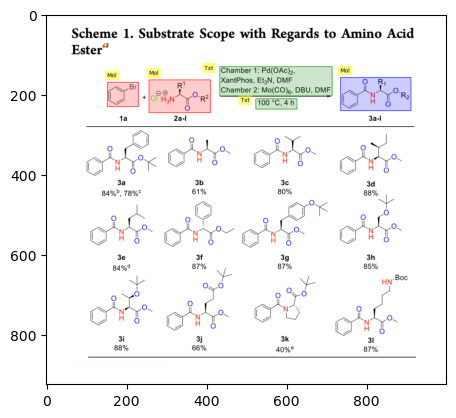

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

Brc1ccccc1


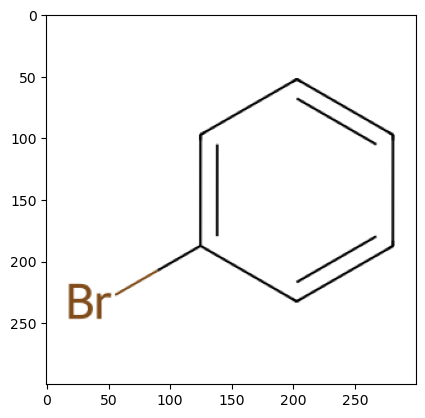

Cl.[2*]OC(=O)[C@H]([7*])N


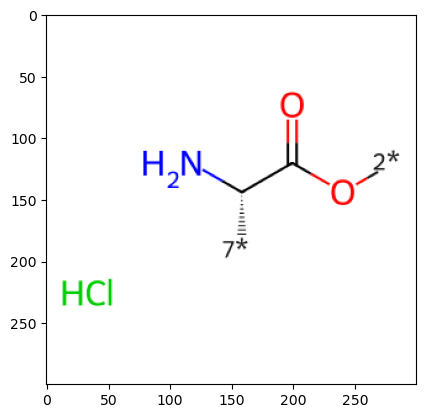

[2*]OC(=O)[C@H]([7*])NC(=O)c1ccccc1


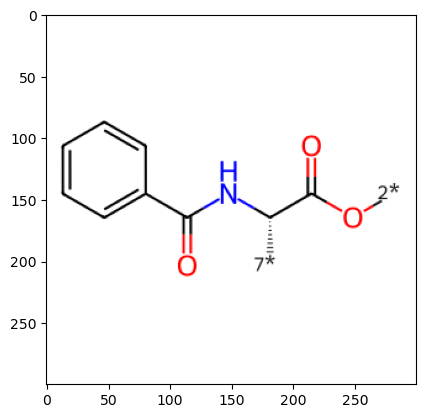

In [18]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [19]:
backed_out = utils.backout(results, coref_results)

these are the predicted reactants corresponding the product with label 3a
Brc1ccccc1


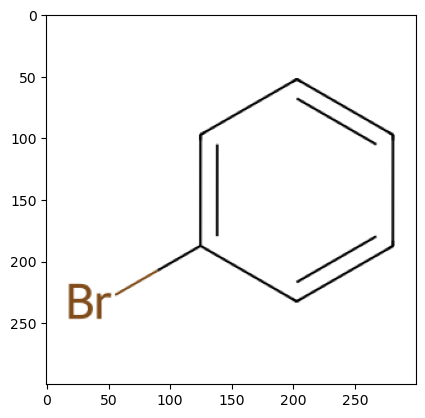

CC(C)(C)OC(=O)[C@H](N)Cc1ccccc1.Cl


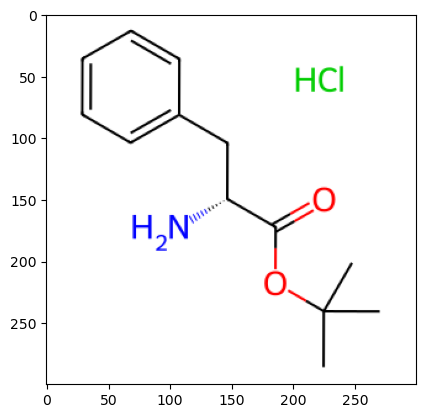

these are the predicted reactants corresponding the product with label 3i
Brc1ccccc1


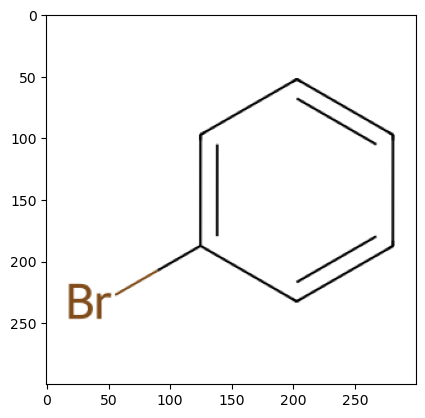

COC(=O)[C@H](N)[C@@H](C)OC(C)(C)C.Cl


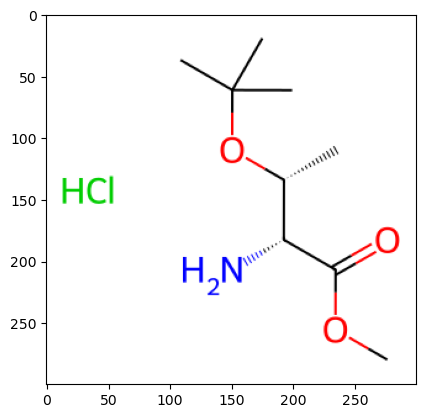

these are the predicted reactants corresponding the product with label 3e
Brc1ccccc1


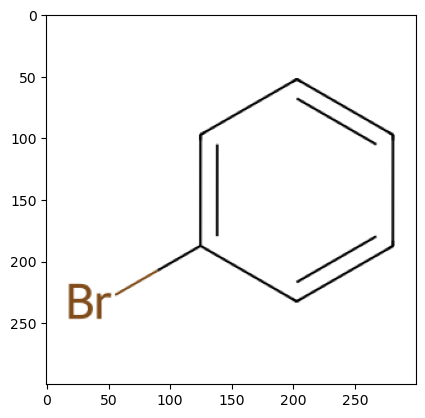

COC(=O)[C@H](N)CC(C)C.Cl


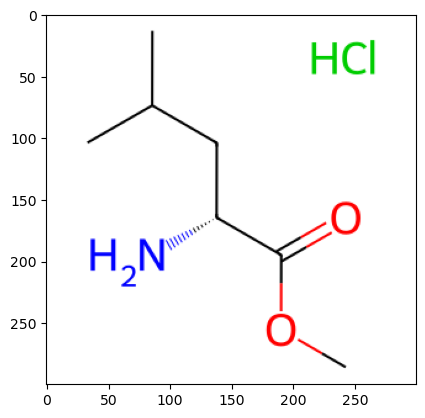

these are the predicted reactants corresponding the product with label 3f
Brc1ccccc1


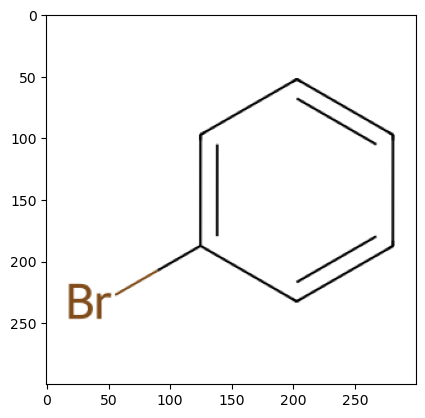

CCOC(=O)[C@H](N)c1ccccc1.Cl


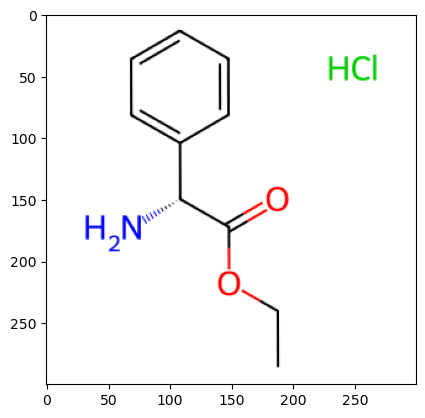

these are the predicted reactants corresponding the product with label 3j
Brc1ccccc1


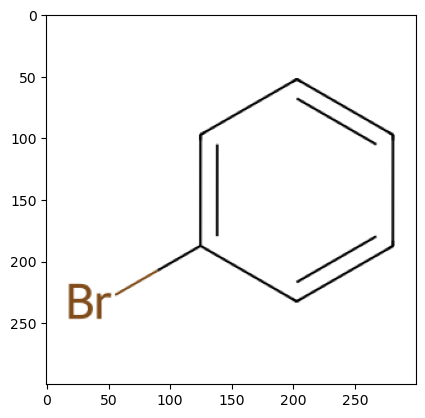

COC(=O)[C@H](N)CCC(=O)OC(C)(C)C.Cl


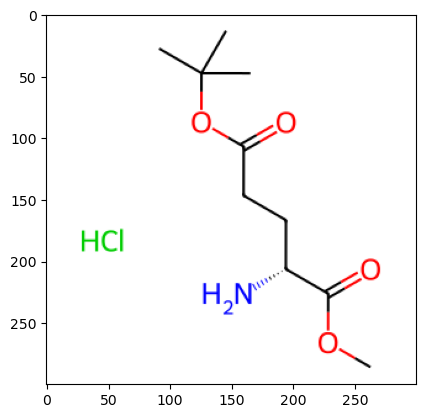

these are the predicted reactants corresponding the product with label 3b
Brc1ccccc1


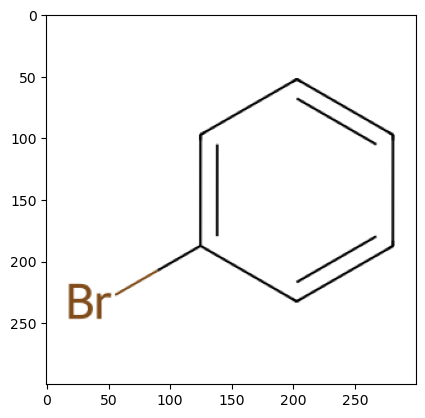

COC(=O)[C@@H](C)N.Cl


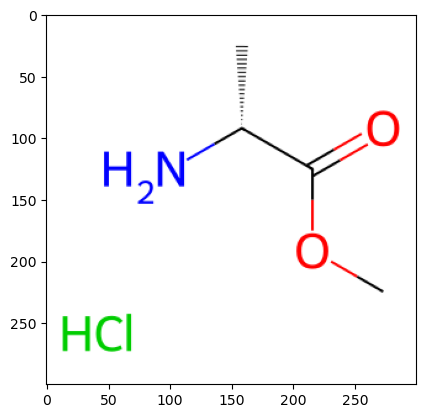

these are the predicted reactants corresponding the product with label 3g
Brc1ccccc1


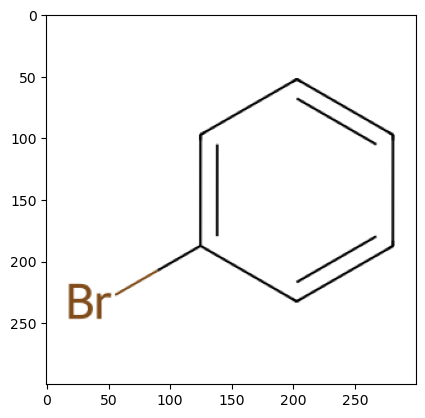

COC(=O)[C@H](N)Cc1ccc(OC(C)(C)C)cc1.Cl


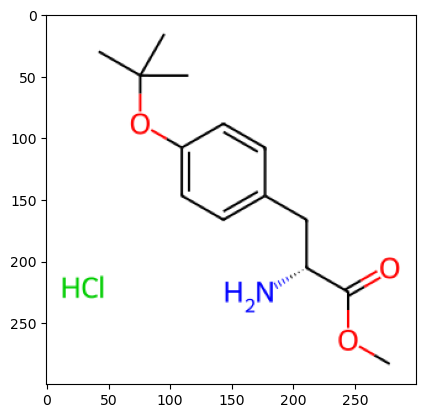

these are the predicted reactants corresponding the product with label 3c
Brc1ccccc1


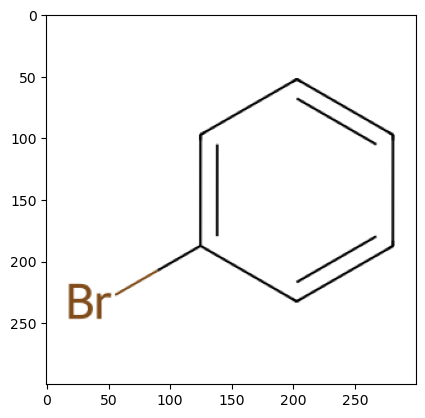

COC(=O)[C@H](N)C(C)C.Cl


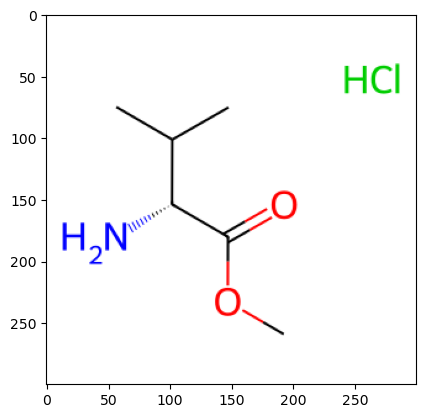

these are the predicted reactants corresponding the product with label 3k
Brc1ccccc1


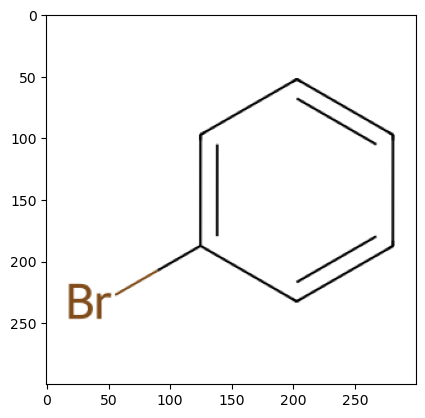

CCC[C@@H](N)C(=O)OC(C)(C)C.Cl


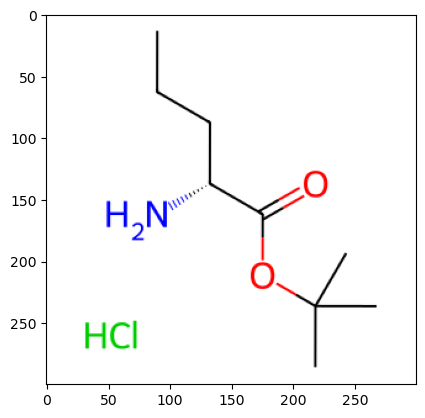

these are the predicted reactants corresponding the product with label 3h
Brc1ccccc1


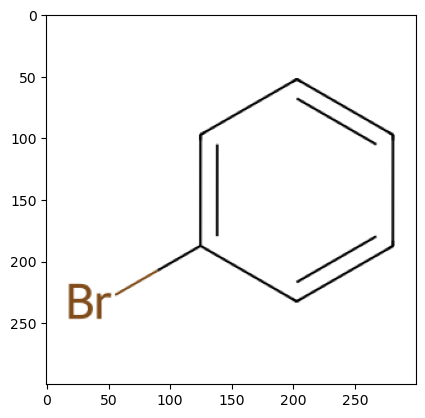

COC(=O)[C@H](N)COC(C)(C)C.Cl


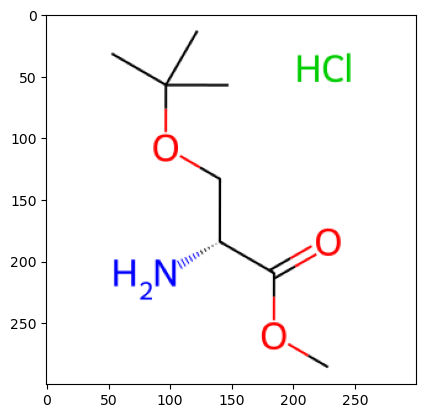

these are the predicted reactants corresponding the product with label 3d
Brc1ccccc1


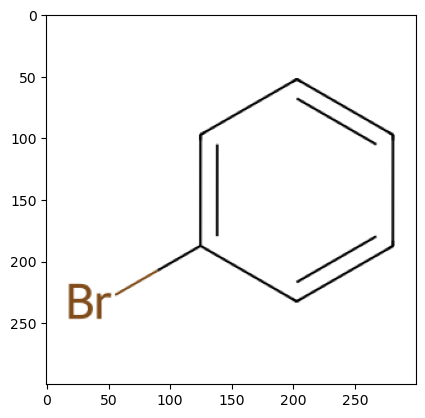

CC[C@H](C)[C@@H](N)C(=O)OC.Cl


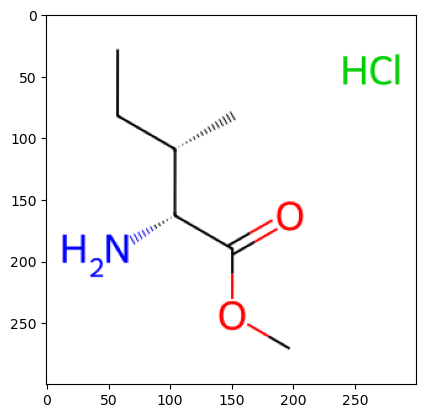

these are the predicted reactants corresponding the product with label 3a-|
Brc1ccccc1


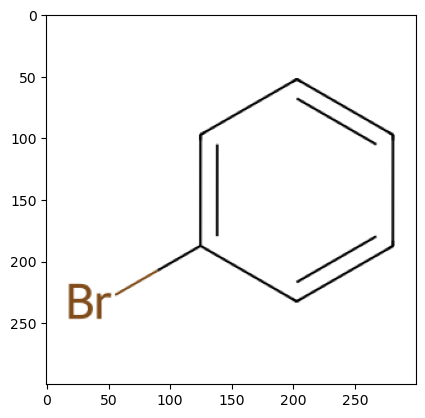

Cl.[2*]OC(=O)[C@@H]([7*])N


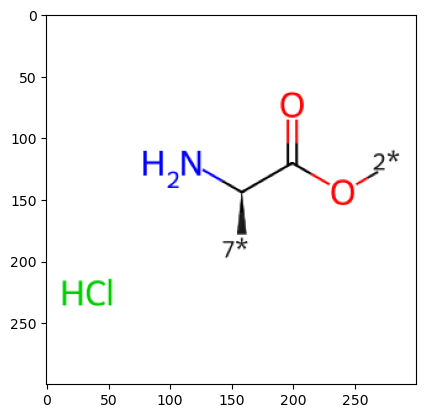

In [20]:
extracted_reactants = {}

for reactants, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:

molsribe gets chirality of reactant 2 completely wrong, so everything is wrong. would only be considered correct in a no chiarlity evaluation. Also it doesn't get the charges on the nitrogen and cl correct, so these are all wrong. the values below are just for the substitution process itself

3a yes
3b yes
3c yes
3d yes
3e yes
3f yes (chiarlity actually good by coincidence)
3g yes
3h yes
3i yes
3j yes
3k no (impossible for current system to handle this case because R group is under specified)
3l no


precision 10/12 recall 10/12